In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Running TFLite models

## Setup

In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.0.0


## Create a Basic Model

In [2]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error')

model.fit(x, y, epochs=200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 0s 71ms/sample - loss: 8.3360
Epoch 2/200
6/6 [==============================] - 0s 1ms/sample - loss: 6.7582
Epoch 3/200
6/6 [==============================] - 0s 2ms/sample - loss: 5.5127
Epoch 4/200
6/6 [==============================] - 0s 1ms/sample - loss: 4.5288
Epoch 5/200
6/6 [==============================] - 0s 1ms/sample - loss: 3.7508
Epoch 6/200
6/6 [==============================] - 0s 1ms/sample - loss: 3.1349
Epoch 7/200
6/6 [==============================] - 0s 2ms/sample - loss: 2.6465
Epoch 8/200
6/6 [==============================] - 0s 1ms/sample - loss: 2.2586
Epoch 9/200
6/6 [==============================] - 0s 1ms/sample - loss: 1.9497
Epoch 10/200
6/6 [==============================] - 0s 1ms/sample - loss: 1.7032
Epoch 11/200
6/6 [==============================] - 0s 2ms/sample - loss: 1.5058
Epoch 12/200
6/6 [==============================] - 0s 1ms/sample - loss: 1.3470
Epoch 13/200
6/6 

Epoch 102/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1275
Epoch 103/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1248
Epoch 104/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1223
Epoch 105/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1198
Epoch 106/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1173
Epoch 107/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1149
Epoch 108/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1125
Epoch 109/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1102
Epoch 110/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1080
Epoch 111/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1057
Epoch 112/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1036
Epoch 113/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.1014
Epoch 114/200
6/

## Generate a SavedModel

In [3]:
export_dir = 'saved_model/linear_regression'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/linear_regression/assets


## Convert the SavedModel to TFLite

In [4]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [6]:
tflite_model_file = pathlib.Path('linear_regression_model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

## Initialize the TFLite Interpreter To Try It Out

In [14]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [19]:
input_details

[{'name': 'dense_input',
  'index': 3,
  'shape': array([1, 1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [20]:
output_details

[{'name': 'Identity',
  'index': 0,
  'shape': array([1, 1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [21]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    output_data = np.array(tflite_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

## Visualize the Model

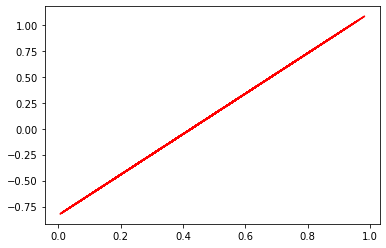

In [22]:
%matplotlib inline

plt.plot(inputs, outputs, 'r')
plt.show()